Input shape: (32, 32, 3)
Output shape: (10,)
Num training data: 50000
Num testing data: 10000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1000      
Total params: 3,174,100
Trainable params: 3,174,100
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
5/5 [==============================] - 14s 3s/step - loss: 0.1743 - categorical_accuracy: 0.1195 - val_loss: 0.1723 - val_categorical

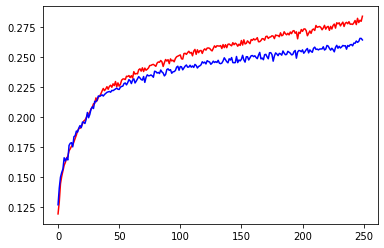

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def main():
  #load data
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

  y_train = np.vstack([vectorize(item) for item in y_train])
  y_test = np.vstack([vectorize(item) for item in y_test])

  input_shape = x_train.shape[1:]
  output_shape = y_train.shape[1:]
  print(f'Input shape: {input_shape}')
  print(f'Output shape: {output_shape}')

  train_length = x_train.shape[0]
  test_length = x_test.shape[0]

  print(f'Num training data: {train_length}')
  print(f'Num testing data: {test_length}')

  #6-fold cross validation
  batch_size = int(train_length / 5)

  # input = tf.keras.layers.Input(shape=input_shape, batch_size=batch_size)
  # flatten = tf.keras.layers.Flatten()
  # hidden_one = tf.keras.layers.Dense(1000, activation=tf.nn.relu, use_bias=True)
  # hidden_two = tf.keras.layers.Dense(100, activation=tf.nn.relu, use_bias=True)
  # output = tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=True)

  #model initialization
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Input(shape=input_shape)) #input
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1000, activation=tf.nn.relu, use_bias=True)) #hidden
  model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, use_bias=True)) #hidden
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False)) #output

  optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.5)
  loss = tf.keras.losses.MeanSquaredError()
  metric = tf.keras.metrics.CategoricalAccuracy()

  model.compile(optimizer=optimizer, loss=loss, metrics=metric, steps_per_execution=5)

  print(model.summary())

  #training process
  epochs = 1000

  model_history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1).history

  cat_accuracy = model_history['categorical_accuracy']
  val_cat_accuracy = model_history['val_categorical_accuracy']
  
  plt.plot(range(epochs), cat_accuracy, color='r')
  plt.plot(range(epochs), val_cat_accuracy, color='b')

def vectorize(n):
  res = np.zeros(10)
  res[n] = 1.0
  return res


if __name__ == '__main__':
  main()

Baseline Report: Training takes a while with so much data so I was only able to get data for this one model. The model has 2 hidden layers with 1000 and 100 layers respectively both using ReLU for activation functions. The output layer has 10 nodes each corresponding to one class from the data labels and uses the softmax activation function. The input layer has 3072 (32x32x3) nodes that correspond to the 'flattened' version of each image. 

Results: In just 250 epochs the model was able to reach ~30% accuracy which is fairly low but it is still much better than random guessing. While the model's progress slowed after ~50 epochs, the accuracy was still increasing slowly which means training for longer will yield better results.

Note: I started working on this project too late and I didn't have enough time to properly train and experiment with different models. This is what I have right before the deadline but I'll train more (hopefully) better models and submit them after the initial deadline